### Sample program for grid search of hyper parameters  

#### Import libraries  

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#### Parameters  

In [40]:
csv_in = 'ai-end1-5.csv'

#### Read CSV file  

In [41]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1001, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   classes          1001 non-null   object
 1   gill_color       1001 non-null   object
 2   gill_attachment  1001 non-null   object
 3   odor             1001 non-null   object
 4   cap_color        1001 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


,classes,gill_color,gill_attachment,odor,cap_color
0,e,w,f,t,e
1,e,g,f,f,n
2,e,e,f,t,n
3,p,h,f,f,g
4,e,n,f,t,n


In [42]:
df_dumm = pd.get_dummies(df, drop_first=True)
display(df_dumm.head())
df = df_dumm

,classes_p,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,odor_t,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


#### Get X and y  

In [43]:
X = df.loc[:, 'gill_color_e':]  # explanatory variables
y = df['classes_p']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (1001, 22)


,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,...,odor_t,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


y: (1001,)
0    0
1    0
2    0
3    1
4    0
Name: classes_p, dtype: uint8


#### Make pipeline and set parameters for grid search   

In [44]:
abc=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=3)            

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [2, 4],
}

#### Preparation of objects for cross validation  

In [45]:
grid_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
gen_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=14)

#### Define the grid search for hyperparameters  

In [46]:
gs = GridSearchCV(abc, param_grid , cv=grid_cv, scoring='accuracy')

#### Estimation of generalization performance  

In [47]:
%%time
nested_score = cross_val_score(gs, X=X, y=y, cv=gen_cv,scoring='accuracy')  # <-----
print(nested_score)
print(nested_score.mean())  # <-----

/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anhvu/miniconda3/envs/

[nan nan nan nan]
nan
CPU times: user 4.38 s, sys: 44.2 ms, total: 4.42 s
Wall time: 4.4 s


/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site

In [48]:
print(nested_score)
print(nested_score.mean())  # <-----

[nan nan nan nan]
nan


**Generalization performance (RMSE) / 汎化性能 (平均2乗誤差平方根): 0.675**  

#### Cross-validation to obtain the model with the best hyperparameter set (best estimator)  
- Note: gs_best is already fit to the whole data (X) in gs.fit(X, y)  

In [49]:
%%time
gs.fit(X, y)
gs_best = gs.best_estimator_

/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anhvu/miniconda3/envs/

CPU times: user 1.11 s, sys: 11.6 ms, total: 1.12 s
Wall time: 1.11 s


/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/anhvu/miniconda3/envs/

In [50]:
print(gs_best)
for k,v in gs_best.get_params(deep=True).items():
    print(k, '->', v)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.1, random_state=3)
base_estimator__ccp_alpha -> 0.0
base_estimator__criterion -> mse
base_estimator__max_depth -> 2
base_estimator__max_features -> None
base_estimator__max_leaf_nodes -> None
base_estimator__min_impurity_decrease -> 0.0
base_estimator__min_impurity_split -> None
base_estimator__min_samples_leaf -> 1
base_estimator__min_samples_split -> 2
base_estimator__min_weight_fraction_leaf -> 0.0
base_estimator__random_state -> None
base_estimator__splitter -> best
base_estimator -> DecisionTreeRegressor(max_depth=2)
learning_rate -> 0.1
loss -> linear
n_estimators -> 50
random_state -> 3


#### Show feature importances of the best model  

In [51]:
print(pd.Series(gs_best.feature_importances_, index=X.columns))

gill_color_e         0.000000
gill_color_g         0.000000
gill_color_h         0.056418
gill_color_k         0.022415
gill_color_n         0.044332
gill_color_o         0.000000
gill_color_p         0.000000
gill_color_r         0.000000
gill_color_u         0.000000
gill_color_w         0.000000
gill_color_y         0.000000
gill_attachment_f    0.008314
odor_t               0.681905
cap_color_c          0.000000
cap_color_e          0.021659
cap_color_g          0.000000
cap_color_n          0.000000
cap_color_p          0.000000
cap_color_r          0.000000
cap_color_u          0.000000
cap_color_w          0.158572
cap_color_y          0.006386
dtype: float64


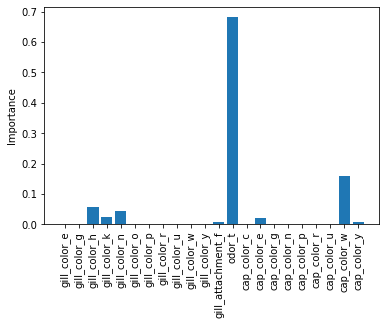

In [52]:
plt.bar(X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

**Features (explanatory variable) with the largest importance: alcohol**  
**重要度が最大の説明変数(特徴量): alcohol**  

#### Save the best predictor  

In [53]:
tag = '12-assign2'
model_file = 'abr_best_ai-{}.joblib'.format(tag)
dump(gs_best, model_file)

NameError: name 'dump' is not defined